## CMSC398L Presentation - Aniket Nayak

### Question:
Given n points on a coordinate plane, how many squares can be formed?

### Approach:
When I initially saw this problem, I went about it by comparing the x and y coordinates of every point combination and see if they were on the same horizontal or vertical line. From there, I would compare distances to see if the points formed a square. The 2 major issues with this approach were 1) the inefficient time complexity and 2) this only worked for squares that were perpendicular to the x-axis.

The method I show in this solution is the following:

Make a hashmap of the <the distance between 2 points> : <those 2 points (a pair)>

When I iterate through the keys of the hashmap, I am going through all possible square side lengths. So when I look at the values, it will contain the pairs of points of all side lengths that match the key — possibly a combination of them forming a square.
From here, it's a matter of going through these pairs of points, checking if any 4 pairs match the criteria to form a square.


In [1]:
import math
from matplotlib import pyplot as plt

#thx from https://stackoverflow.com/questions/3831144/finding-the-squares-in-a-plane-given-n-points

Helper function to calculate distance between two points

In [2]:
def distPoints(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

These are the points being used as an example:
(-1, -1), (0, -1), (0, 0), (0, 1), (1, 0), (-1, 0), (-1, 1), (1, 1)

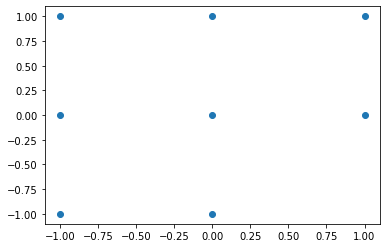

In [3]:
x = [-1,0,0,0,1,-1,-1,1]
y = [-1, -1, 0, 1, 0, 0, 1, 1]
plt.plot(x,y, 'o')

As we can see above, there are 4 squares; 3 small ones of equal size and 1 large that is rotated 45 degrees.

In [4]:
# Getting coordinates in appropriate format
coords = []
for i in range(len(x)):
    coords.append((x[i],y[i]))
coords

[(-1, -1), (0, -1), (0, 0), (0, 1), (1, 0), (-1, 0), (-1, 1), (1, 1)]

In [5]:
distMap = {} # main hashmap — < distance between a pair of points > : < the pair >
tot = 0      # number of total square
squares = [] # saving coordinates of the found squares

# iterate through all pair combinations for 2 reasons
# 1) build the distMap
# 2) check if any added point to the map causes a square to be formedd
for i in range(len(coords)-1):
    for j in range(i+1, len(coords)):
        
        # find distance between the 2 points
        dist = distPoints(coords[i], coords[j])
        
        # new distance found, no need to check anything further
        if dist not in distMap:
            distMap[dist] = [[coords[i], coords[j]]]
            
        # existing distance has been found, check if a pair of points exists that make a square all together
        else:
            
            # iterate through all other pairs
            for q in range(len(distMap[dist])-2):
                p = distMap[dist][q]
                # checking if the 2 pairs of points are connected at some vertex - won't make a square
                if p[0] == coords[i] or p[0] == coords[j] or p[1] == coords[i] or p[1] == coords[j]:
                    continue
                    
                # two possible valid square sides that may exist, check for both
                pair1a, pair1b, c1 = {coords[i], p[0]}, {coords[j], p[1]}, 0
                pair2a, pair2b, c2 = {coords[i], p[1]}, {coords[j], p[0]}, 0
                
                # looking if the remaining side edges exist or not
                for r in range(q+1, len(distMap[dist])):
                    checkP = set(distMap[dist][r])
                    if checkP == pair1a or checkP == pair1b:
                        c1 += 1
                    elif checkP == pair2a or checkP == pair2b:
                        c2 +=1
                    
                    # an equilateral triangle is formed so we disregard that
                    if c1 == 1 and c2 == 1:
                        continue
                        
                    # once four valid points are found, no need to continue checking
                    if c1 == 2 or c2 == 2:
                        print("Found square:", coords[i], coords[j], p[0], p[1])
                        tot += 1
                        squares_coords = []
                        squares_coords.append(coords[i])
                        squares_coords.append(coords[j])
                        squares_coords.append(p[0])
                        squares_coords.append(p[1])
                        squares.append(squares_coords)
                        break
                        
            # add the current point to the list
            distMap[dist].append([coords[i], coords[j]])

Found square: (0, 0) (-1, 0) (-1, -1) (0, -1)
Found square: (0, 1) (-1, 0) (0, -1) (1, 0)
Found square: (1, 0) (1, 1) (0, 0) (0, 1)
Found square: (-1, 0) (-1, 1) (0, 0) (0, 1)


We can see that all 4 squares were found, including the rotated square. Below is the created hash map from the code above.

In [6]:
distMap

{1.0: [[(-1, -1), (0, -1)],
  [(-1, -1), (-1, 0)],
  [(0, -1), (0, 0)],
  [(0, 0), (0, 1)],
  [(0, 0), (1, 0)],
  [(0, 0), (-1, 0)],
  [(0, 1), (-1, 1)],
  [(0, 1), (1, 1)],
  [(1, 0), (1, 1)],
  [(-1, 0), (-1, 1)]],
 1.4142135623730951: [[(-1, -1), (0, 0)],
  [(0, -1), (1, 0)],
  [(0, -1), (-1, 0)],
  [(0, 0), (-1, 1)],
  [(0, 0), (1, 1)],
  [(0, 1), (1, 0)],
  [(0, 1), (-1, 0)]],
 2.23606797749979: [[(-1, -1), (0, 1)],
  [(-1, -1), (1, 0)],
  [(0, -1), (-1, 1)],
  [(0, -1), (1, 1)],
  [(1, 0), (-1, 1)],
  [(-1, 0), (1, 1)]],
 2.0: [[(-1, -1), (-1, 1)],
  [(0, -1), (0, 1)],
  [(1, 0), (-1, 0)],
  [(-1, 1), (1, 1)]],
 2.8284271247461903: [[(-1, -1), (1, 1)]]}